0. Import bibliotek

In [52]:
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

1. Wyświetlenie listy id produktów o których zostały pobrane opinie

In [53]:
print(*[file.split(".")[0] for file in os.listdir("opinions")], sep="\n")

151210226


2. Wczytanie kodu produktu o którym mają zostać przeanalizowane opinie


In [54]:
product_id = input("Podaj kod produktu: ")
opinions = pd.read_json(f'opinions/{product_id}.json')
opinions.stars = opinions.stars.apply(lambda s: s.split("/")[0].replace(",", ".")).astype(float)
opinions

,opinion_id,author,recommend,stars,content,cons,pros,opinion_date,purchase_date,up_vote,down_vote
0,17886609,w...7,Polecam,5.0,Bardzo dobry sprzed polecam sprzęt od firmy TCL,[],[],2023-09-10 11:53:31,2023-09-01 06:41:04,4,0
1,17950592,J...9,None,3.0,Spoiler ! nie kupiłabym już ! \nPlusy\n\nCen...,[],[],2023-09-29 08:17:32,2023-09-23 09:41:10,3,21
2,17616026,m...8,Polecam,5.0,"Telewizor bardzo dobrze działa, ekran bardzo j...",[],[],2023-06-15 17:26:18,2023-06-08 22:25:01,0,0
3,18550674,r...i,Polecam,5.0,Na razie jestem zadowolony,[],[],2024-04-04 21:59:08,2024-03-21 21:18:07,0,0
4,18273359,d...k,Polecam,4.5,stosunek jakosci do ceny,[],[],2024-01-04 13:29:02,2023-12-27 17:57:31,0,0
5,18222491,j...1,Polecam,5.0,Jest super,[],[],2023-12-19 02:14:19,2023-12-11 14:44:33,0,0
6,18583016,h...1,Polecam,5.0,B dobrze,[],[],2024-04-18 07:07:00,2024-03-19 18:47:08,0,0
7,17878778,KubusElo,Nie polecam,2.0,Przetestowałem w życiu wiele telewizorów i jak...,[],[],2023-09-07 09:58:49,None,8,6
8,17812249,s...i,Nie polecam,1.0,Produkt ze sklepu ***** przyjechał z wadą fabr...,[],[],2023-08-17 14:37:23,2023-08-02 17:34:42,2,4
9,17827306,s...i,Nie polecam,0.5,Towar uszkodzony fabrycznie . Odesłany do serw...,[],[],2023-08-23 08:03:59,2023-08-02 17:27:34,2,5


3. Podstawowe statystyki

In [55]:
opinions_count = opinions.shape[0]
pros_count = opinions.pros.astype(bool).sum()
cons_count = opinions.cons.astype(bool).sum()
average_stars = opinions.stars.mean()
average_stars

3.6

4. histogram o częstości ocen w opiniach

[Text(0, 0, ''),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, ''),
 Text(0, 0, '1'),
 Text(0, 0, ''),
 Text(0, 0, '1'),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, '1'),
 Text(0, 0, '5')]

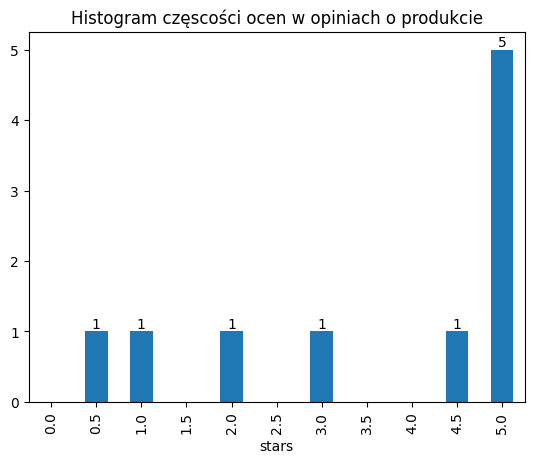

In [64]:
stars_distribution = opinions.stars.value_counts().reindex(np.arange(0,5.5,0.5))
ax = stars_distribution.plot.bar()
ax.set_title("Histogram częscości ocen w opiniach o produkcie")
ax.set_xlabel("Liczba gwiazdek")
ax.set_ylabel("Liczba opinii")
ax.bar_label(ax.containers[0], label_type = "edge", fmt=lambda l: int(l) if l > 0 else "")